# WeatherPy

Analysis:
* Observed trend 1
* Observed trend 2
* Observed trend 3

In [1]:
# dependencies
from citipy import citipy
from random import uniform
from config import api_key
import requests
import numpy
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# base_url
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Generate Cities List

In [2]:
# generate random latitudes and longitudes
total = 700
lat_samples = [numpy.random.uniform(-90, 90) for i in range(total)]
lon_samples = [numpy.random.uniform(-180, 180) for i in range(total)]

# prepare lists for storing data
result_samples = []
city_samples = []
country_samples = []

# iterate through cities
for i in range(total):
    lat = lat_samples[i]
    lon = lon_samples[i]

    # find the nearest city to that pair of coordinates
    # find the city name and country code
    result = citipy.nearest_city(lat, lon)
    city = result.city_name
    country = result.country_code

    # append data to lists
    result_samples.append(result)
    city_samples.append(city)
    country_samples.append(country)

city_samples

['tuktoyaktuk',
 'bredasdorp',
 'lompoc',
 'vardo',
 'dunedin',
 'sao filipe',
 'lavrentiya',
 'gornopravdinsk',
 'jumla',
 'lagoa',
 'busselton',
 'voyvozh',
 'norman wells',
 'nizhneyansk',
 'barentsburg',
 'kamenskoye',
 'arraial do cabo',
 'jamestown',
 'mataura',
 'west bay',
 'tuktoyaktuk',
 'butaritari',
 'hilo',
 'hobart',
 'albany',
 'carauari',
 'hobart',
 'hithadhoo',
 'hilo',
 'ushuaia',
 'murray bridge',
 'tiksi',
 'illoqqortoormiut',
 'punta arenas',
 'punta arenas',
 'khatanga',
 'kishi',
 'victoria',
 'werda',
 'punta arenas',
 'mys shmidta',
 'rikitea',
 'kismayo',
 'atuona',
 'srednekolymsk',
 'rikitea',
 'cheney',
 'grand river south east',
 'praia da vitoria',
 'jamestown',
 'albany',
 'saskylakh',
 'mataura',
 'bredasdorp',
 'clyde river',
 'vaini',
 'port alfred',
 'bethel',
 'bay city',
 'thompson',
 'ust-bolsheretsk',
 'talnakh',
 'saint-philippe',
 'miri',
 'krasnogorskiy',
 'punta arenas',
 'stoyba',
 'bengkulu',
 'palabuhanratu',
 'bredasdorp',
 'atuona',
 'd

# Perform API Calls

In [3]:
# test to get response for one city
city = "paris"
params = {"appid" : api_key, "q" : city, "units" : "imperial"}
response = requests.get(base_url, params)
data = response.json()

In [4]:
# iterate through cities and perform API calls
data_list = []
city_list = []
country_list = []
date_list = []
lat_list = []
lon_list = []
cloudiness_list = []
humidity_list = []
temp_list = []
wind_speed_list = []
n = 0

# loop through cities to make api calls
for i in range(total):
    city = city_samples[i]
    params = {"appid" : api_key, "q" : city, "units" : "imperial"}
    response = requests.get(base_url, params)
    
    # only store data into lists when http status code is 200 (ok)
    if response.status_code == 200:
        data = response.json()
        
        # append data to lists
        city_list.append(city)
        country_list.append(data["sys"]["country"])
        date_list.append(data["dt"])
        lat_list.append(lat_samples[i])
        lon_list.append(lon_samples[i])
        data_list.append(data)
        cloudiness_list.append(data["clouds"]["all"])
        humidity_list.append(data["main"]["humidity"])
        temp_list.append(data["main"]["temp_max"])
        wind_speed_list.append(data["wind"]["speed"])

        # print city number, name and url
        print(f"Processing Record {n%50+1} of Set {int(n/50+1)} | {city}")
        print(response.url)

Processing Record 1 of Set 1 | tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=tuktoyaktuk&units=imperial
Processing Record 1 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=bredasdorp&units=imperial
Processing Record 1 of Set 1 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=lompoc&units=imperial
Processing Record 1 of Set 1 | vardo
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=vardo&units=imperial
Processing Record 1 of Set 1 | dunedin
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=dunedin&units=imperial
Processing Record 1 of Set 1 | sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=sao+filipe&units=imperial
Processing Record 1 of Set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weath

Processing Record 1 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=saint-philippe&units=imperial
Processing Record 1 of Set 1 | miri
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=miri&units=imperial
Processing Record 1 of Set 1 | krasnogorskiy
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=krasnogorskiy&units=imperial
Processing Record 1 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=punta+arenas&units=imperial
Processing Record 1 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=bredasdorp&units=imperial
Processing Record 1 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=atuona&units=imperial
Processing Record 1 of Set 1 | dikson
http://api.openweathermap.or

Processing Record 1 of Set 1 | ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=ostrovnoy&units=imperial
Processing Record 1 of Set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=saint-philippe&units=imperial
Processing Record 1 of Set 1 | puerto del rosario
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=puerto+del+rosario&units=imperial
Processing Record 1 of Set 1 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=bredasdorp&units=imperial
Processing Record 1 of Set 1 | fairbanks
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=fairbanks&units=imperial
Processing Record 1 of Set 1 | pisco
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=pisco&units=imperial
Processing Record 1 of Set 1 | yerbogachen
http://api.

Processing Record 1 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kapaa&units=imperial
Processing Record 1 of Set 1 | severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=severo-kurilsk&units=imperial
Processing Record 1 of Set 1 | port blair
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=port+blair&units=imperial
Processing Record 1 of Set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=jamestown&units=imperial
Processing Record 1 of Set 1 | kahului
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kahului&units=imperial
Processing Record 1 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kapaa&units=imperial
Processing Record 1 of Set 1 | husavik
http://api.openweathermap.org/data/2.5/weathe

Processing Record 1 of Set 1 | barrow
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=barrow&units=imperial
Processing Record 1 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=puerto+ayora&units=imperial
Processing Record 1 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=ushuaia&units=imperial
Processing Record 1 of Set 1 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=lavrentiya&units=imperial
Processing Record 1 of Set 1 | robinson
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=robinson&units=imperial
Processing Record 1 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kapaa&units=imperial
Processing Record 1 of Set 1 | huilong
http://api.openweathermap.org/data/2.5/weather?ap

Processing Record 1 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=vaini&units=imperial
Processing Record 1 of Set 1 | videbaek
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=videbaek&units=imperial
Processing Record 1 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=chokurdakh&units=imperial
Processing Record 1 of Set 1 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=bethel&units=imperial
Processing Record 1 of Set 1 | arona
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=arona&units=imperial
Processing Record 1 of Set 1 | thompson
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=thompson&units=imperial
Processing Record 1 of Set 1 | qena
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4f

Processing Record 1 of Set 1 | mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=mahebourg&units=imperial
Processing Record 1 of Set 1 | mezen
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=mezen&units=imperial
Processing Record 1 of Set 1 | kasane
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kasane&units=imperial
Processing Record 1 of Set 1 | veranopolis
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=veranopolis&units=imperial
Processing Record 1 of Set 1 | santa cruz
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=santa+cruz&units=imperial
Processing Record 1 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=atuona&units=imperial
Processing Record 1 of Set 1 | souillac
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 1 of Set 1 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=rikitea&units=imperial
Processing Record 1 of Set 1 | jacareacanga
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=jacareacanga&units=imperial
Processing Record 1 of Set 1 | kapaa
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kapaa&units=imperial
Processing Record 1 of Set 1 | pundaguitan
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=pundaguitan&units=imperial
Processing Record 1 of Set 1 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=busselton&units=imperial
Processing Record 1 of Set 1 | mataura
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=mataura&units=imperial
Processing Record 1 of Set 1 | tadine
http://api.openweathermap.org/data/2.5/weath

Processing Record 1 of Set 1 | gat
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=gat&units=imperial
Processing Record 1 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=punta+arenas&units=imperial
Processing Record 1 of Set 1 | xuzhou
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=xuzhou&units=imperial
Processing Record 1 of Set 1 | ribeira grande
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=ribeira+grande&units=imperial
Processing Record 1 of Set 1 | nizhneangarsk
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=nizhneangarsk&units=imperial
Processing Record 1 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=pevek&units=imperial
Processing Record 1 of Set 1 | nizwa
http://api.openweathermap.org/data/2.5/we

Processing Record 1 of Set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=bluff&units=imperial
Processing Record 1 of Set 1 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=arraial+do+cabo&units=imperial
Processing Record 1 of Set 1 | airai
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=airai&units=imperial
Processing Record 1 of Set 1 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=new+norfolk&units=imperial
Processing Record 1 of Set 1 | kloulklubed
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=kloulklubed&units=imperial
Processing Record 1 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=port+alfred&units=imperial
Processing Record 1 of Set 1 | mataura
http://api.openweathermap.org

Processing Record 1 of Set 1 | port hawkesbury
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=port+hawkesbury&units=imperial
Processing Record 1 of Set 1 | porto novo
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=porto+novo&units=imperial
Processing Record 1 of Set 1 | sivakasi
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=sivakasi&units=imperial
Processing Record 1 of Set 1 | college
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=college&units=imperial
Processing Record 1 of Set 1 | san matias
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=san+matias&units=imperial
Processing Record 1 of Set 1 | erenhot
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=erenhot&units=imperial
Processing Record 1 of Set 1 | kapaa
http://api.openweathermap.org/dat

Processing Record 1 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=hermanus&units=imperial
Processing Record 1 of Set 1 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=chokurdakh&units=imperial
Processing Record 1 of Set 1 | butaritari
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=butaritari&units=imperial
Processing Record 1 of Set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=dikson&units=imperial
Processing Record 1 of Set 1 | berlevag
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=berlevag&units=imperial
Processing Record 1 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=f5577870a4fe514c0a6c56ee569c5c7b&q=punta+arenas&units=imperial
Processing Record 1 of Set 1 | castro
http://api.openweathermap.org/data/2.5

In [5]:
# generate a dataframe
df = pd.DataFrame(
    {
        "City" : city_list,
        "Cloudiness" : cloudiness_list,
        "Country" : country_list,
        "Date": date_list,
        "Humidity" : humidity_list,
        "Lat" : lat_list,
        "Lng" : lon_list,
        "Max Temp" : temp_list,
        "Wind Speed" : wind_speed_list
    }
)

# format latitude and longitude to 2 decimal points
df["Lat"] = df["Lat"].map("{:.2f}".format)
df["Lng"] = df["Lng"].map("{:.2f}".format)

# convert data format of latitude and longitude to numeric
df["Lat"] = pd.to_numeric(df["Lat"])
df["Lng"] = pd.to_numeric(df["Lng"])

# count number of all rows that's not NaN, in each column
df.count()

City          631
Cloudiness    631
Country       631
Date          631
Humidity      631
Lat           631
Lng           631
Max Temp      631
Wind Speed    631
dtype: int64

In [6]:
# display the dataframe
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,tuktoyaktuk,90,CA,1526608800,92,85.40,-131.31,28.40,10.29
1,bredasdorp,12,ZA,1526611782,93,-72.47,15.67,63.98,21.16
2,lompoc,1,US,1526610900,82,29.32,-125.02,62.60,14.99
3,vardo,90,US,1526610900,100,71.57,32.18,68.00,3.36
4,dunedin,76,NZ,1526611732,63,-52.34,178.61,52.64,8.75


# Temperature (F) vs. Latitude Plot

In [7]:
# Set style, linewidth of borders, and font
plt.style.use("dark_background")
matplotlib.rcParams["axes.linewidth"] = 3
matplotlib.rcParams.update({"font.size": 15})

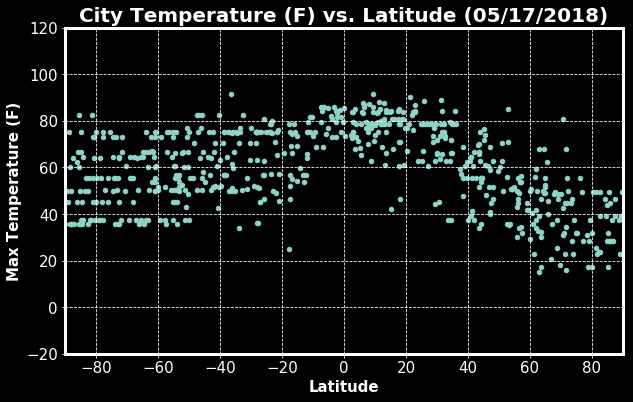

In [15]:
# make a scatter plot
df.plot(kind="scatter", x="Lat", y="Max Temp", figsize=(10,6))
plt.title("City Temperature (F) vs. Latitude (05/17/2018)", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Max Temperature (F)", weight="bold")
plt.grid(ls="--")
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.show()

# Humidity (%) vs. Latitude Plot

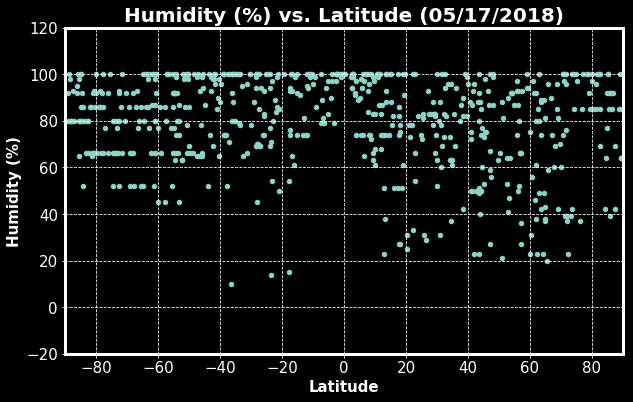

In [16]:
# make a scatter plot
df.plot(kind="scatter", x="Lat", y="Humidity", figsize=(10,6))
plt.title("Humidity (%) vs. Latitude (05/17/2018)", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Humidity (%)", weight="bold")
plt.grid(ls="--")
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.show()

# Cloudiness (%) vs. Latitude Plot

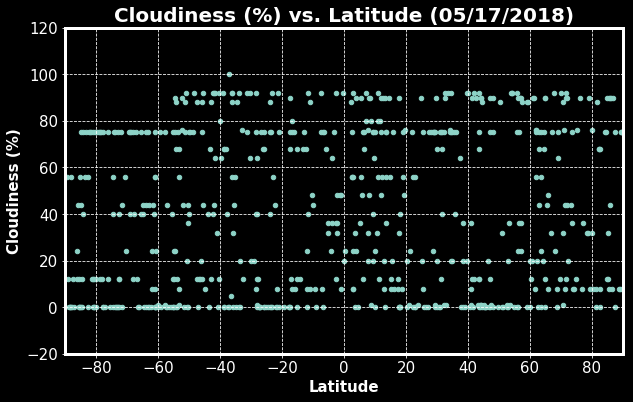

In [12]:
# make a scatter plot
df.plot(kind="scatter", x="Lat", y="Cloudiness", figsize=(10,6))
plt.title("Cloudiness (%) vs. Latitude (05/17/2018)", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Cloudiness (%)", weight="bold")
plt.grid(ls="--")
plt.xlim(-90, 90)
plt.ylim(-20, 120)
plt.show()

# Wind Speed (mph) vs. Latitude Plot

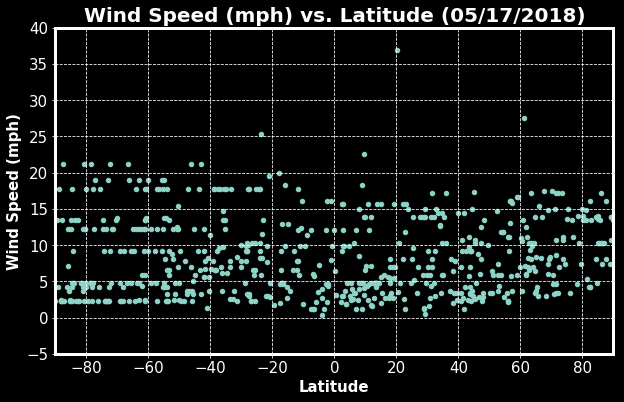

In [17]:
# make a scatter plot
df.plot(kind="scatter", x="Lat", y="Wind Speed", figsize=(10,6))
plt.title("Wind Speed (mph) vs. Latitude (05/17/2018)", fontsize=20, fontweight="bold")
plt.xlabel("Latitude", weight="bold")
plt.ylabel("Wind Speed (mph)", weight="bold")
plt.grid(ls="--")
plt.xlim(-90, 90)
plt.ylim(-5, 40)
plt.show()